# Unsupervised Learning - Project by Sarah Banadaki 

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

I will import all the necessary libraries 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA 

In [65]:
df = pd.read_csv('Wholesale_Data.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'Wholesale_Data.csv'

In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

As we can see, we have different variables:

- FRESH: annual spending on fresh products (Continuous)
- MILK: annual spending on milk products (Continuous)
- GROCERY: annual spending on grocery products (Continuous)
- FROZEN: annual spending on frozen products (Continuous)
- DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous)
- DELICATESSEN: annual spending on delicatessen products (Continuous)
- CHANNEL: customers' Channel - Horeca or Retail (Nominal)
- REGION: customers' Region - Lisbon, Oporto, or Other (Nominal)


In [ ]:
# grabbing the products only 
products = df.columns[~df.columns.isin(['Channel', 'Region'])].tolist()
products

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [ ]:
df.shape

(440, 8)

We havee 440 datasets 

In [ ]:
df.drop(['Channel', 'Region'], axis=1).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


The above shows me the summary statistics of all products 

In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

As we can see, no null values and the data is very clean but need to investigate more with graphs 

In [ ]:
df[df.duplicated()]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


No duplicates either 

# Correlations

I am going to create a heat map to see the correlation between different variables 


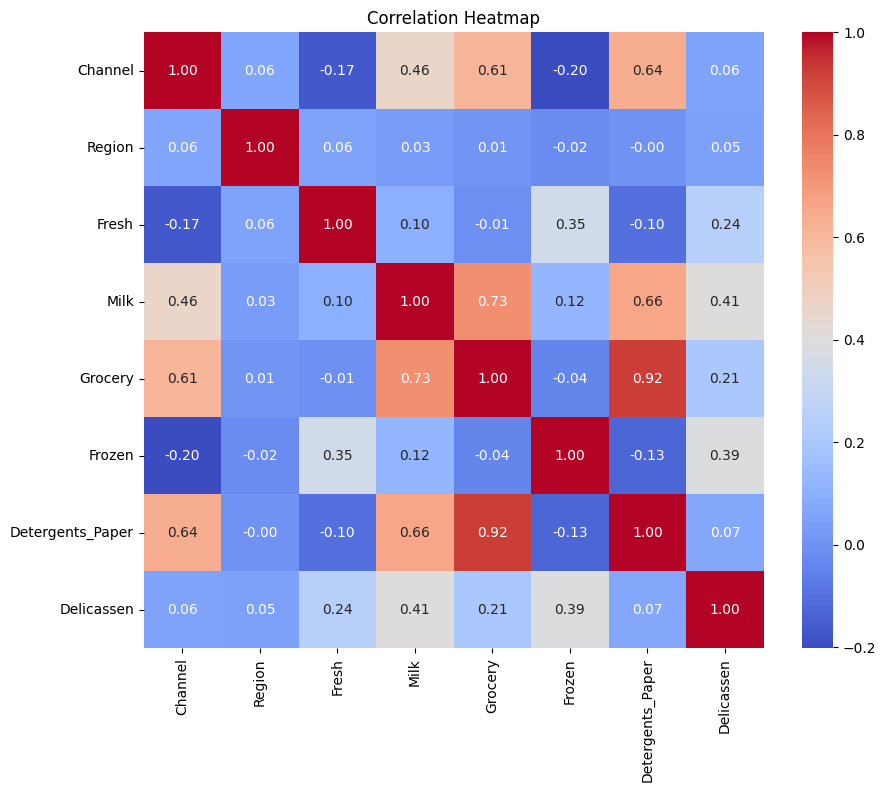

In [ ]:
corr_matrix = df.corr(method='pearson')


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')  
plt.show()

**From the heatmap above, the strongest correlations are as follows:**

- **Detergents_Paper and Grocery:** There is a very strong correlation of 0.92 between these two variables.
- **Milk and Grocery:** A strong correlation of 0.73 is observed between these variables.
- **Detergents_Paper and Milk:** Showing a moderate correlation of 0.66.


# EDA using Histograms 

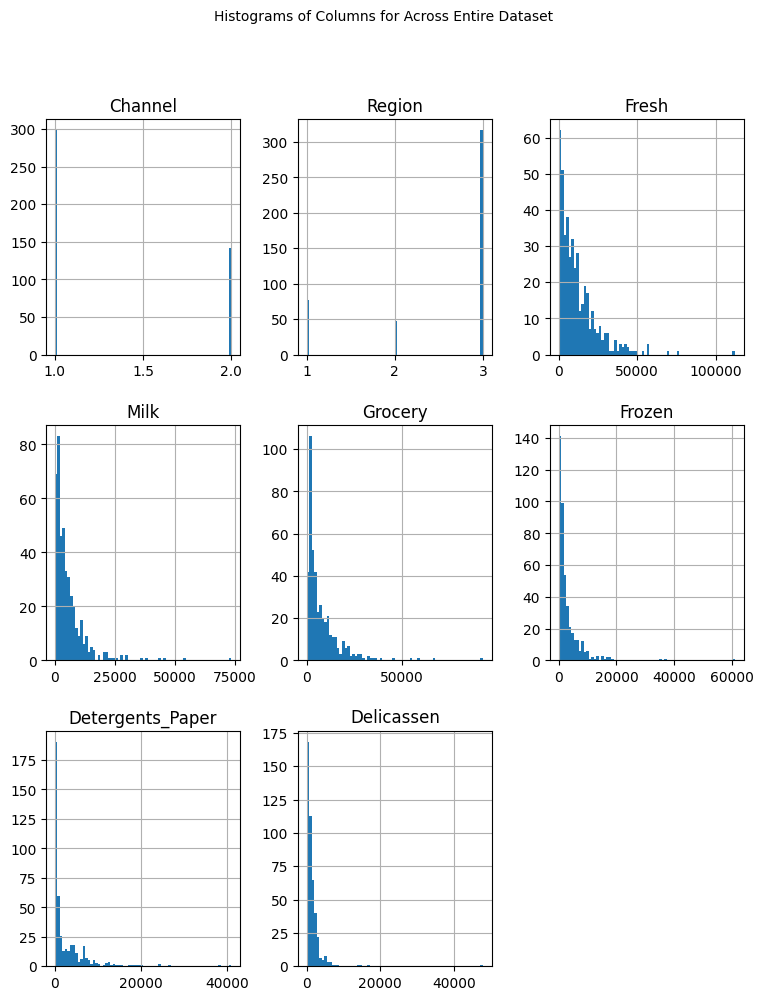

In [ ]:
df.hist(bins=70, figsize=(9, 11))
plt.suptitle('Histograms of Columns for Across Entire Dataset', fontsize=10)
plt.show()

**According to the histograms above, all data are left-skewed and not normally distributed.**


**I'm going to verify this observation by conducting a Shapiro-Wilk test to obtain the p-value**


In [ ]:
from scipy.stats import shapiro

alpha = 0.05  

# grabbing the product columns 
products = df.columns[~df.columns.isin(['Channel', 'Region'])].tolist()

# Looping through the product columns
for column in products:
    data = df[column]  
    stat, p_value = shapiro(data)
    
    print(f"Column: {column}")  
    print(f"Shapiro-Wilk Test Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    print("-----------------------------------------")


Column: Fresh
Shapiro-Wilk Test Statistic: 0.7814
P-value: 0.0000
Sample does not look Gaussian (reject H0)
-----------------------------------------
Column: Milk
Shapiro-Wilk Test Statistic: 0.6283
P-value: 0.0000
Sample does not look Gaussian (reject H0)
-----------------------------------------
Column: Grocery
Shapiro-Wilk Test Statistic: 0.6762
P-value: 0.0000
Sample does not look Gaussian (reject H0)
-----------------------------------------
Column: Frozen
Shapiro-Wilk Test Statistic: 0.5283
P-value: 0.0000
Sample does not look Gaussian (reject H0)
-----------------------------------------
Column: Detergents_Paper
Shapiro-Wilk Test Statistic: 0.6055
P-value: 0.0000
Sample does not look Gaussian (reject H0)
-----------------------------------------
Column: Delicassen
Shapiro-Wilk Test Statistic: 0.3611
P-value: 0.0000
Sample does not look Gaussian (reject H0)
-----------------------------------------


The Shapiro-Wilk Test further confirmed that the distributions are not normal or Gaussian.

## Checking for Outliers Using Box Plots


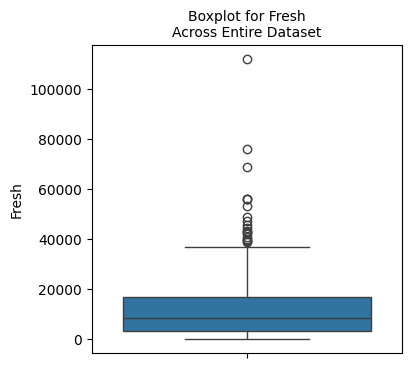

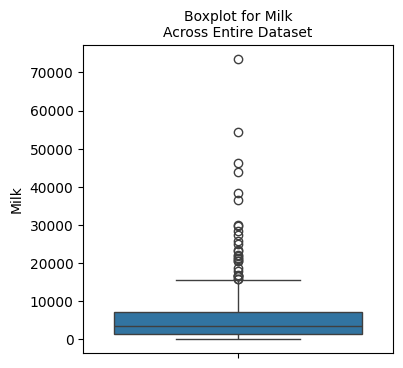

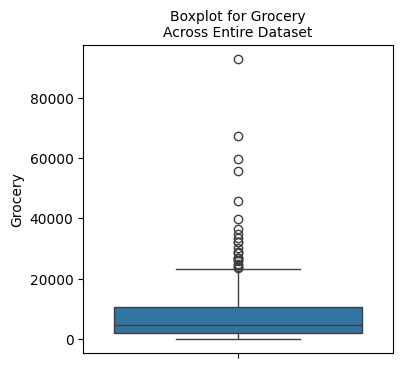

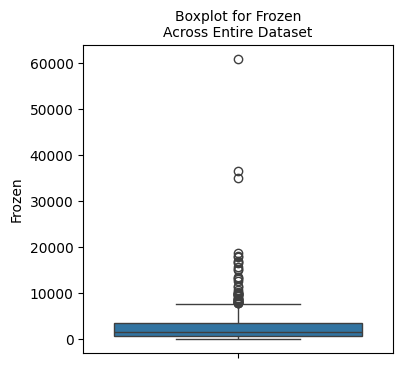

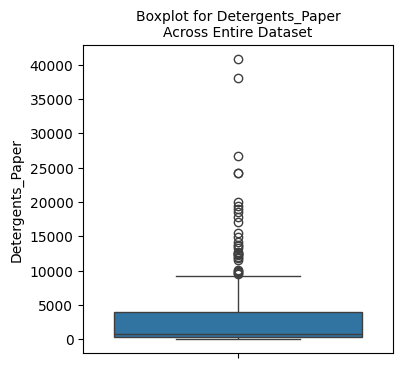

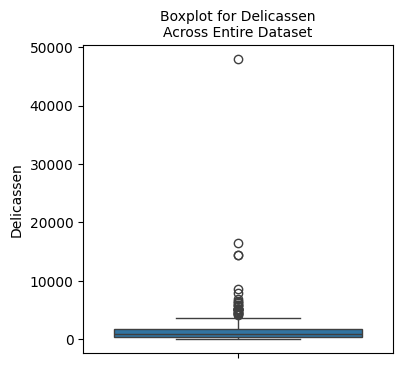

In [ ]:
for category in products:
    plt.figure(figsize=(4,4))
    plt.title(f'Boxplot for {category}\nAcross Entire Dataset', fontsize=10)
    sns.boxplot(df[category])

Lots of outliers but I plan to delve deeper into this by assessing their percentage within the dataset. 

In [ ]:
def GetOutlierInfo(series, category):
    q1 = np.quantile(series, 0.25)
    q3 = np.quantile(series, 0.75)
    med = np.median(series)
    iqr = q3 - q1
    outlierspread = 1.5 * iqr
    upper = q3 + (1.5 * outlierspread)
    lower = q1 - (1.5 * outlierspread)

    outliers = series[(series <= lower) | (series >= upper)]

    print(f"{len(outliers)} Outliers within {category}, or {round((len(outliers) / df.shape[0]) * 100, 2)}%:\n") 

for category in products:
    print(f"\nFor Predictor {category}:")
    GetOutlierInfo(df[category], category)



For Predictor Fresh:
8 Outliers within Fresh, or 1.82%:


For Predictor Milk:
20 Outliers within Milk, or 4.55%:


For Predictor Grocery:
12 Outliers within Grocery, or 2.73%:


For Predictor Frozen:
23 Outliers within Frozen, or 5.23%:


For Predictor Detergents_Paper:
22 Outliers within Detergents_Paper, or 5.0%:


For Predictor Delicassen:
19 Outliers within Delicassen, or 4.32%:



## Outlier Analysis Summary

### Findings:
- Few outliers detected in each product category, with the maximum percentage in any category around 5%.
- I'm contemplating whether or not to remove outliers because they offer valuable insights into understanding customer spending habits. 
- Outliers contain valuable information for clustering algorithms, especially for Agglomerative Clustering. 

### Impact on Analysis Methods:
- PCA requires variance representation, and outliers contribute to this variance. Hence, not removing them.
- KMeans clustering may be influenced by outliers but with a limited number, resilience to outliers is expected (not many outliers).
### Outlier Statistics:

| Category          | # Outliers | % Outliers |
|-------------------|------------|------------|
| Fresh             | 8          | 1.82       |
| Milk              | 20         | 4.55       |
| Grocery           | 12         | 2.73       |
| Frozen            | 23         | 5.23       |
| Detergents_Paper  | 22         | 5          |
| Delicassen        | 19         | 4.32       |


### Conclusion:
- Outliers are essential for PCA analysis and less impactful on Agglomerative Clustering.
- Not removing outliers, aiming for resilience in KMeans clustering due to their relatively low presence in the dataset.


Data when scaled:

In [ ]:
scaler = StandardScaler()
X_scaled_products = scaler.fit_transform(df[products])
X_scaled_products

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

Data when NOT scaled:

In [ ]:
X_products = df[products].values
X_products

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

# NOTE:  It's generally recommended to scale data before analysis. However, given that all product columns share the same unit (monetary unit), I'll proceed without scaling the data. To explore both approaches, I'll use both scaled and unscaled data for the remaining activities. 

A valuable technique for determining the optimal number of clusters (and consequently evaluating our model) is leveraging the "elbow rule" observed in a distortion plot. By fitting the data using different cluster numbers and recording the distortion, known as inertia in sklearn, we gauge how tightly grouped the points within each cluster are. Hence, we aim for a lower inertia value, indicating closer points within clusters. Inertia values typically range from zero upwards.

# Elbow Rule:

In [ ]:
# Credit goes to Amir Parizi for this function : https://github.com/lighthouse-labs/unsupervised-learning/blob/main/Centroid%20Model%20-%20Tutorial.ipynb

def plot_distortion(X_scaled_products, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X_scaled_products)  
        distortions.append(km.inertia_)
        
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal Clusters')
    plt.show()


/Users/yasara/Unsupervised-Learning-Wholesale-Analysis/Unsupervised-Learning-Wholesale-Analysis/myenv/lib/python3.8/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.8 is maybe too old for this OS.
  warnings.warn(


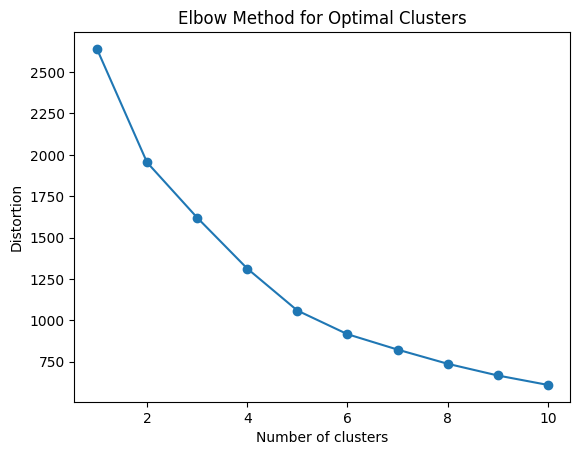

In [ ]:
plot_distortion(X_scaled_products, max_clusters=10)

It's challenging to determine the optimal cluster using the scaled data. Therefore, I'll switch to using the unscaled data to identify the optimal cluster.

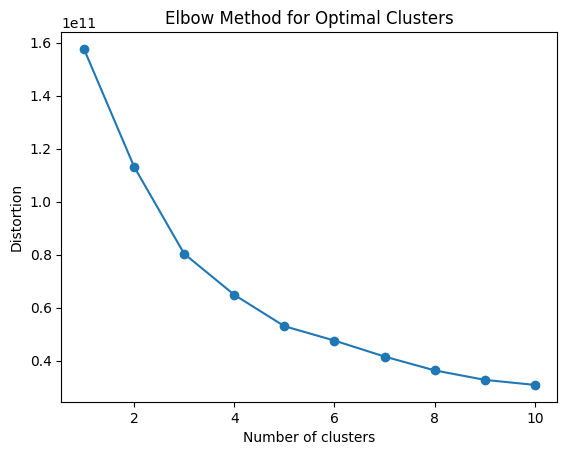

In [ ]:
plot_distortion(X_products, max_clusters=10)

Although clearer, determining the optimal number of clusters remains challenging. Hence, I'll use the Silhouette Score for a more definitive evaluation:

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6]

silhouette_scores = []

for n_clusters in range_n_clusters:

    km = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = km.fit_predict(X_scaled_products)  
    
    
    silhouette_avg = silhouette_score(X_scaled_products, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.4f}")


optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_n_clusters}")


For n_clusters = 2, the silhouette score is 0.5472
For n_clusters = 3, the silhouette score is 0.5483
For n_clusters = 4, the silhouette score is 0.3485
For n_clusters = 5, the silhouette score is 0.3690
For n_clusters = 6, the silhouette score is 0.3782
The optimal number of clusters is: 3


/Users/yasara/Unsupervised-Learning-Wholesale-Analysis/Unsupervised-Learning-Wholesale-Analysis/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yasara/Unsupervised-Learning-Wholesale-Analysis/Unsupervised-Learning-Wholesale-Analysis/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yasara/Unsupervised-Learning-Wholesale-Analysis/Unsupervised-Learning-Wholesale-Analysis/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

# Perfect! The optimal number of clusters is: 3 

In [ ]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

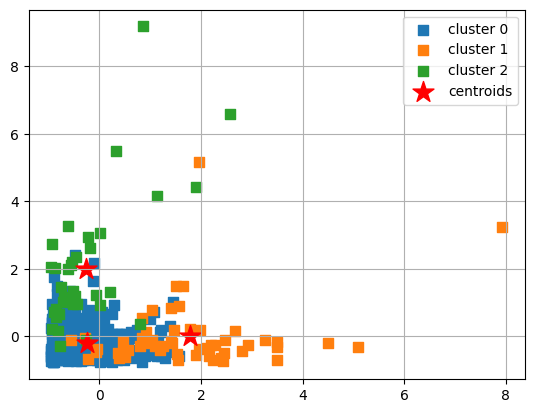

In [ ]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init='auto',
            random_state=42)


y_km_clusters_scaled = km.fit_predict(X_scaled_products)
plot_clusters(X_scaled_products, y_km_clusters_scaled, plt_cluster_centers=True)

It seems evident that the clients of this wholesale distributor can be effectively grouped into three distinct clusters based on their yearly expenditure across all product categories available. 

I'll generate the same graph using unscaled data to check if it yields a clearer and more informative result: 

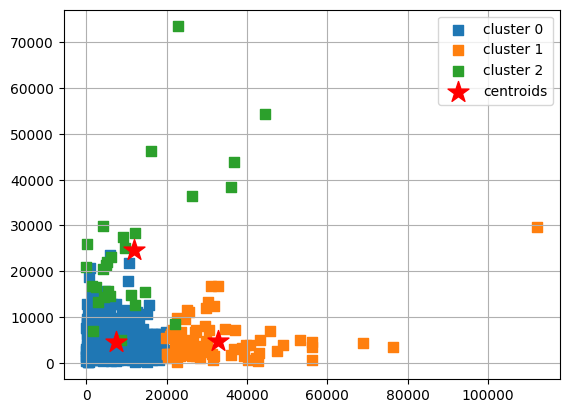

In [ ]:
# Create the km2 object for a model that uses non-scaled data
km2 = KMeans(n_clusters=3,
            init='k-means++',
            n_init='auto',
            random_state=42)


y_km_clusters = km2.fit_predict(X_products)


plot_clusters(X_products, y_km_clusters, plt_cluster_centers=True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [ ]:
# Credit goes to Amir Parizi for this function : https://github.com/lighthouse-labs/unsupervised-learning/blob/main/Hierarchical%20Model%20-%20Tutorial.ipynb

def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

/Users/yasara/Unsupervised-Learning-Wholesale-Analysis/Unsupervised-Learning-Wholesale-Analysis/myenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


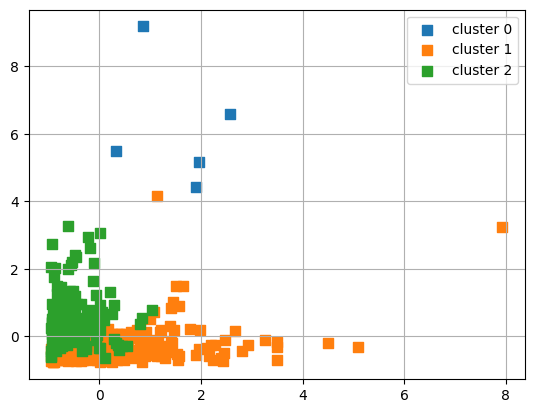

In [ ]:
from sklearn.cluster import AgglomerativeClustering


import scipy.cluster.hierarchy as sch

ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

y_hc_scaled = ac.fit_predict(X_scaled_products)
plot_clusters(X_scaled_products, y_hc_scaled)

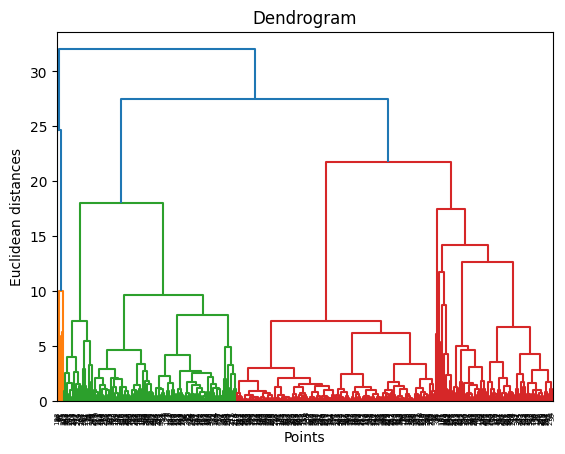

In [ ]:
plot_dendrogram(X_scaled_products)

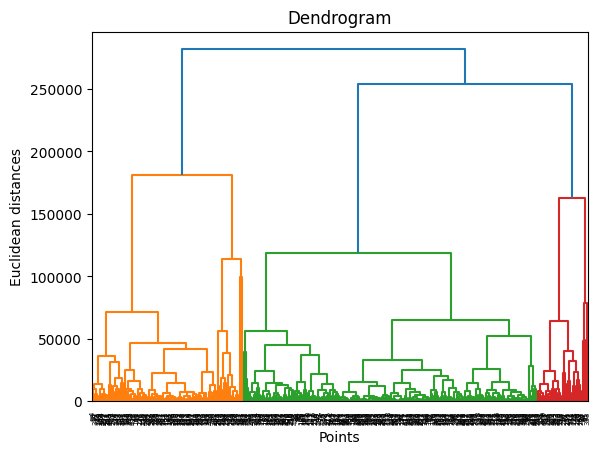

In [ ]:
plot_dendrogram(X_products)

Utilizing the non-scaled data once more generates a more distinct and clearer graph. 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [ ]:
# Credit goes to Amir Parizi for this function : https://github.com/lighthouse-labs/unsupervised-learning/blob/main/PCA%20-%20Tutorial.ipynb

def plot_explained_variance_ratio(pca_model):
    explained_variance_ratio_array = pca_model.explained_variance_ratio_
    plt.figure(figsize=(10,6))
    plt.scatter(x=[i+1 for i in range(len(explained_variance_ratio_array))],
                y=explained_variance_ratio_array,
               s=200, alpha=0.75,c='orange',edgecolor='k')
    plt.grid(True)
    plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
    plt.xlabel("Principal components",fontsize=15)
    plt.xticks([i+1 for i in range(len(explained_variance_ratio_array))],fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel("Explained variance ratio",fontsize=15)
    plt.show()

In [ ]:
ca = PCA(n_components=None) 

x_pca = pca.fit(X_products)

In [ ]:
pca.explained_variance_

array([1.64995904e+08, 1.45452098e+08, 2.51399785e+07, 1.58039005e+07,
       5.39276364e+06, 2.20364065e+06])

In [ ]:
pca.explained_variance_ratio_

array([0.45961362, 0.40517227, 0.07003008, 0.04402344, 0.01502212,
       0.00613848])

In [ ]:
sum_exp_var_pc1_pc2 = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
sum_exp_var_pc1_pc2_pc3 = sum_exp_var_pc1_pc2 + pca.explained_variance_ratio_[2]
print (f"Sum of explained variance ratio of PC1 and PC2: {sum_exp_var_pc1_pc2}")

print (f"Sum of explained variance ratio of PC1 and PC2 and PC3: {sum_exp_var_pc1_pc2_pc3}")

Sum of explained variance ratio of PC1 and PC2: 0.8647858849391101
Sum of explained variance ratio of PC1 and PC2 and PC3: 0.9348159654105451


# The "Sum of explained variance ratio" for PC1 and PC2 indicates that when I consider the first two principal components (PC1 and PC2) together, they collectively explain approximately 86.48% of the total variance in the dataset.

# The "Sum of explained variance ratio" for PC1, PC2, and PC3 indicates that when I consider the first three principal components (PC1, PC2, and PC3) together, they collectively explain approximately 93.48% of the total variance in the dataset.

# These values represent the cumulative amount of variance explained by each set of principal components. They are helpful in determining how much information or variability is retained by considering a specific number of principal components. In this case, PC1 and PC2 capture 86.48% of the variance, and adding PC3 increases the explained variance to 93.48%.

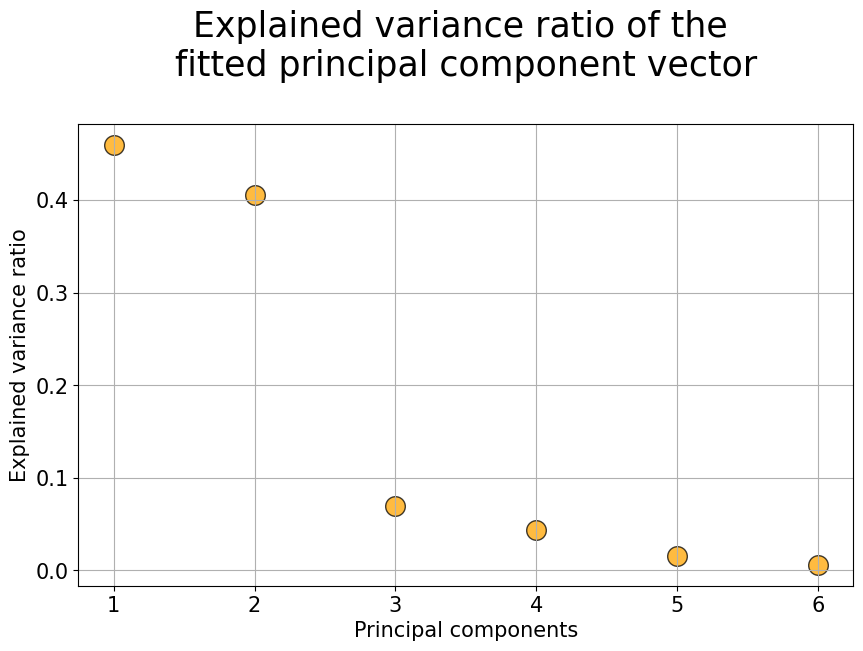

In [ ]:
plot_explained_variance_ratio(pca)

# The graph above strongly supports this finding! 

In [ ]:
x_pca_pcs = PCA(n_components=2)
x_pca_pcs = x_pca_pcs.fit_transform(X_products)

Now, execute the fit_transform operation on the X_products dataset to compute the two principal components through PCA. These components will be available for potential downstream applications such as visualization or utilization in subsequent models.

In [ ]:
x_pca_pcs = PCA(n_components=2)
x_pca_pcs = x_pca_pcs.fit_transform(X_products)

# Part V - Conclusion

From the model I developed and the exploratory data analysis (EDA) conducted, these are the findings.

### Key Insights:

1. **Clustering Patterns:**
   - KMeans analysis and Hierarchical Clustering both identified three distinct customer segments based on their spending across six product categories.
  
2. **Dimensionality Reduction:**
   - PCA revealed that 86% variance was explained by PC1 and PC2, rising to 93% with PC3. Opting for two principal components balances variance coverage and simplifies analyses.

3. **Scaling Impact:**
   - Scaling, although applied for model convergence, hindered interpretation of the Elbow Graph due to extremely small inertia values. Optimal clusters (n_clusters=3) were better discerned in unscaled data.
  
4. **Challenges and Considerations:**
   - StandardScaler usage obscured insights. Exploring alternative scaling methods could maintain convergence rates while enhancing graph interpretability and overall model utility.
